# 활성화 함수 (Activation Function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 시각화 x 값
X = np.linspace(-5, 5, 100)

### 계단 함수 (Step Function)

$ f(x) = \begin{cases} 1, & x \geq 0 \\ 0, & x < 0 \end{cases}$

- 입력값이 0 이상이면 1, 그렇지 않으면 0 출력
- 미분 불가하고, 작은 변화에도 값이 급격히 변하여 역전파 학습에 부적합

In [2]:
def step_function(x):
    return np.where(x > 0, 1, 0)

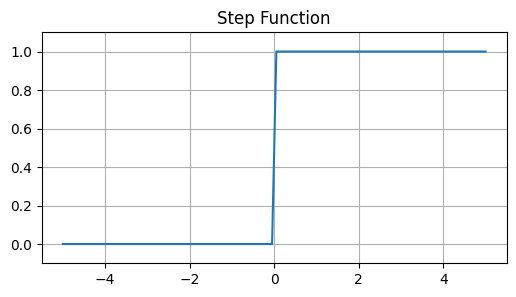

In [5]:
plt.figure(figsize=(6, 3))
plt.plot(X, step_function(X))
plt.title('Step Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드

$ f(x) = \frac{1}{1 + e^{-x}} $

- 출력 범위: (0, 1)
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(Vanishing Gradient) 문제 발생 가능

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

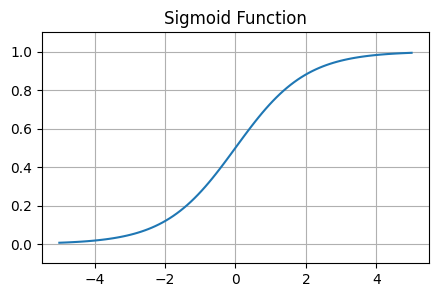

In [7]:
plt.figure(figsize=(5, 3))
plt.plot(X, sigmoid(X))
plt.title('Sigmoid Function')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### 하이퍼볼릭 탄젠트 함수 (Hyperbolic Tangent, Tanh)

$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

- 출력 범위: (-1, 1)
- 시그모이드보다 중심이 0에 가까워 더 빠른 학습 진행 가능
- 기울기 소실 문제 발생 가능

In [13]:
def tanh(x):
    # return np.exp(x) - np.exp(-x) / np.exp(x) + np.exp(-x)
    return np.tanh(x)

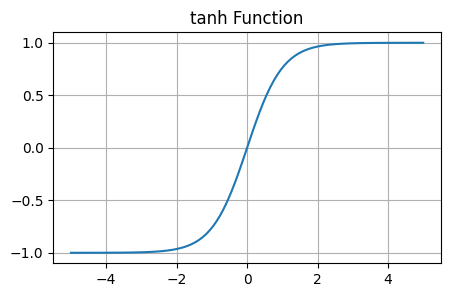

In [17]:
plt.figure(figsize=(5, 3))
plt.plot(X, tanh(X))
plt.title('tanh Function')
plt.grid()
plt.show()

### ReLU (Rectified Linear Unit)

$ f(x) = \max(0,x) $

- 출력 범위: $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLu) 문제 발생 가능

In [18]:
def relu(x):
    return np.maximum(0, x)

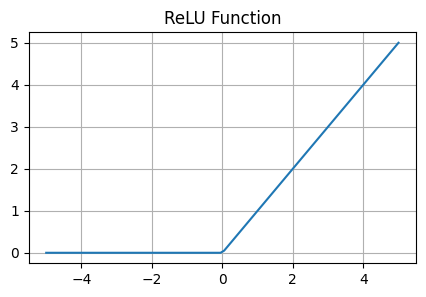

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(X, relu(X))
plt.title('ReLU Function')
plt.grid()
plt.show()

### Leaky ReLU

$ f(x) = \begin{cases} x. & x \geq 0 \\ \alpha x, & x < 0\end{cases}$

- 출력 범위 : $(-\infty, \infty)$

- ReLU의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$를 적용 ($\alpha$ 는 일반적으로 0.01 사용)

In [24]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

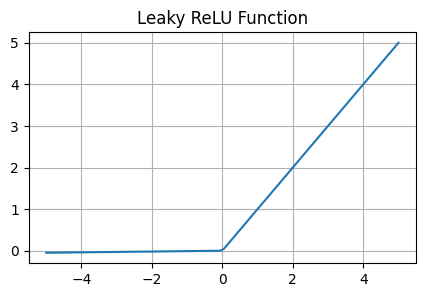

In [25]:
plt.figure(figsize=(5, 3))
plt.plot(X, leaky_relu(X))
plt.title('Leaky ReLU Function')
plt.grid()
plt.show()

In [40]:
import numpy as np
import pandas as pd

np.random.seed(42)
X = np.random.uniform(-5, 5, size=10)
X.sort()

df = pd.DataFrame({
    "input (X)": X,
    "Step function": step_function(X),
    "Sigmoid": sigmoid(X),
    "tanh": tanh(X),
    "ReLU": relu(X),
    "Leaky ReLU": leaky_relu(X)
})

df

,input (X),Step function,Sigmoid,tanh,ReLU,Leaky ReLU
0,-4.419164,0,0.011901,-0.999710,0.000000,-0.044192
1,-3.440055,0,0.031067,-0.997946,0.000000,-0.034401
2,-3.439814,0,0.031074,-0.997945,0.000000,-0.034398
3,-1.254599,0,0.221905,-0.849568,0.000000,-0.012546
4,0.986585,1,0.728413,0.755902,0.986585,0.986585
5,1.011150,1,0.733245,0.766237,1.011150,1.011150
6,2.080726,1,0.889016,0.969308,2.080726,2.080726
7,2.319939,1,0.910515,0.980867,2.319939,2.319939
8,3.661761,1,0.974956,0.998681,3.661761,3.661761
9,4.507143,1,0.989090,0.999757,4.507143,4.507143


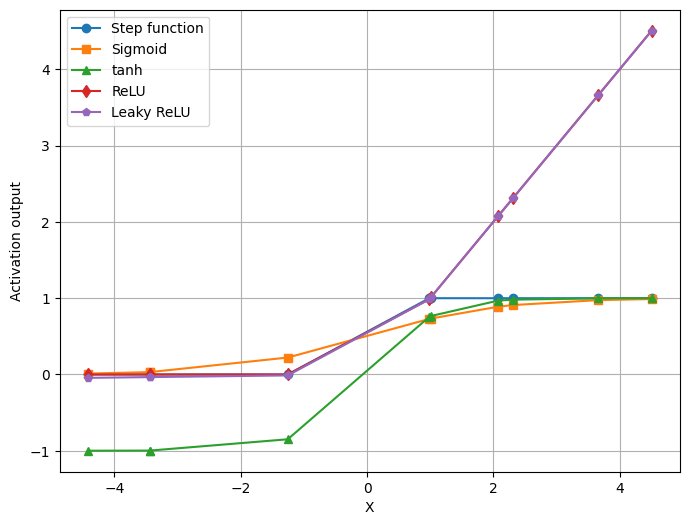

In [41]:
plt.figure(figsize=(8, 6))

plt.plot(df["input (X)"], df["Step function"], label='Step function', marker='o')
plt.plot(df["input (X)"], df["Sigmoid"], label='Sigmoid', marker='s')
plt.plot(df["input (X)"], df["tanh"], label='tanh', marker='^')
plt.plot(df["input (X)"], df["ReLU"], label='ReLU', marker='d')
plt.plot(df["input (X)"], df["Leaky ReLU"], label='Leaky ReLU', marker='p')

plt.xlabel('X')
plt.ylabel('Activation output')
plt.legend()
plt.grid()
plt.show()
